In [11]:
import os
import csv
from matplotlib import rc
import matplotlib.pyplot as plt

In [12]:
base = 2
path = f'N={base}'

In [13]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [14]:
files = [file for file in os.listdir(f'{path}') if file.endswith('.csv')]
for i, file in enumerate(files):
    alpha  = []
    energy = []

    with open(f'{path}/{file}', newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)

        for row in reader:
            alpha.append(float(row[0]))
            energy.append(float(row[1]))

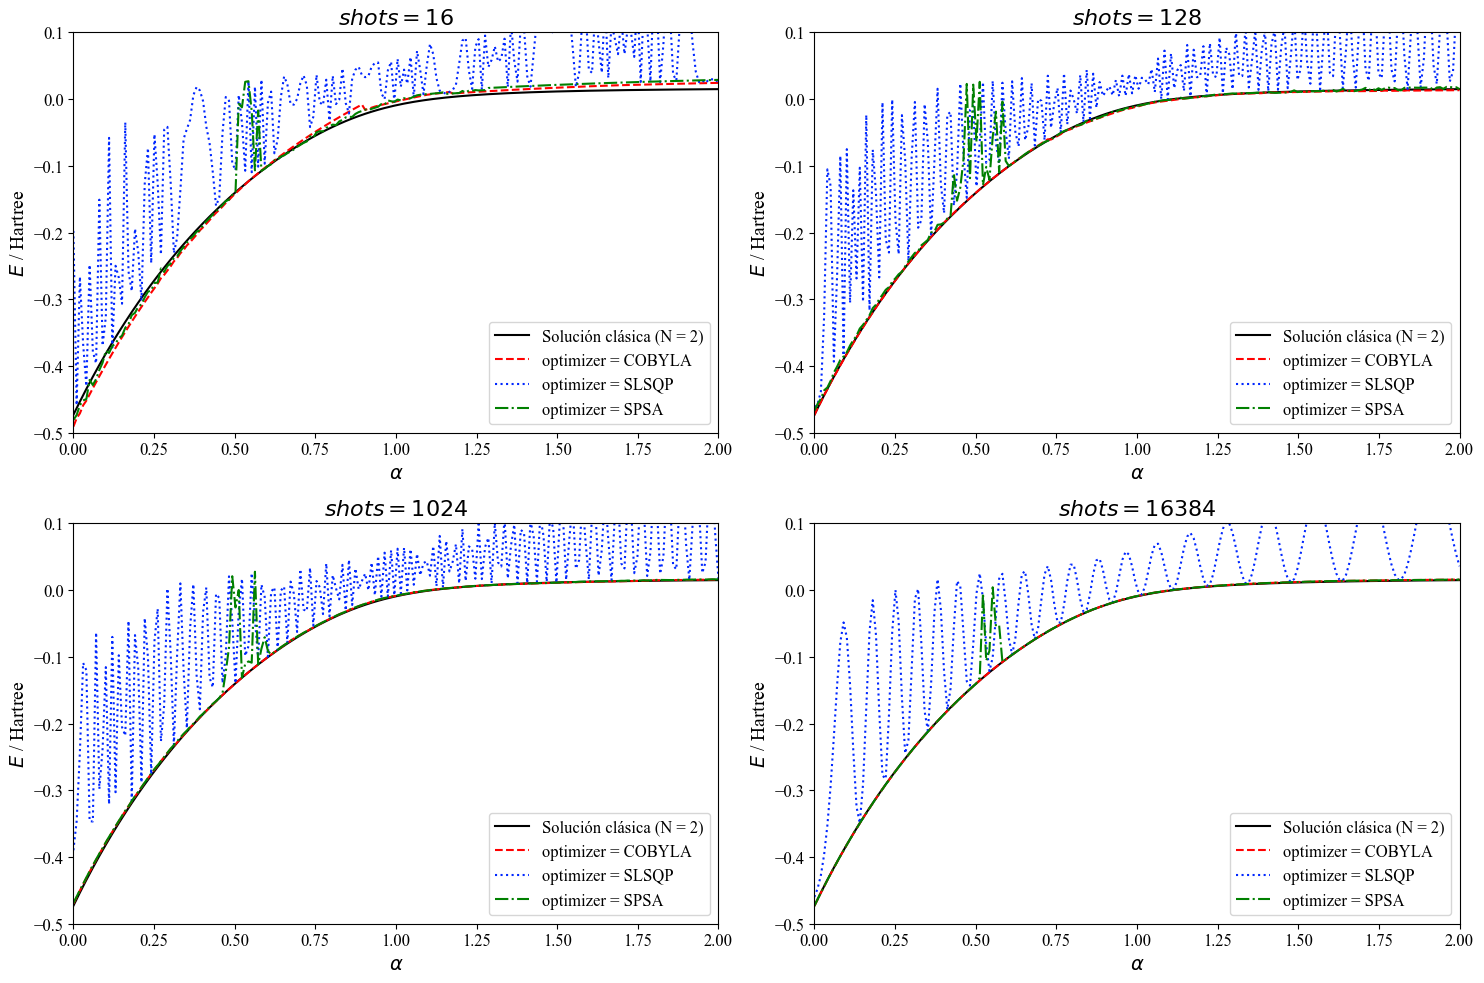

In [15]:
colors = ['red', '#0027FF', 'green']
lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir(path) if '.' not in folder]

rows = 2
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 10))

for n, folder in enumerate(folders):
    files = [file for file in os.listdir(f'{path}/{folder}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for i, file in enumerate(files):
        shots = int(file.split('=')[1].split('.')[0])

        alpha  = []
        energy_vqe = []

        with open(f'{path}/{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                alpha.append(float(row[0]))
                energy_vqe.append(float(row[1]))


        row = i // columns
        column = i % columns

        if n == 0:
            axs[row, column].plot(alpha, energy, color='black', marker='', linestyle='-', label=f'Solución clásica (N = {base})')

        axs[row, column].plot(alpha, energy_vqe, color=colors[n], marker='', linestyle=lines[n], label=f'optimizer = {folder.split('_')[1]}')
        axs[row, column].set_title(f'$shots = {shots}$', fontsize=16)
        axs[row, column].set_xlabel(r'$\alpha$', fontsize=14)
        axs[row, column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[row, column].grid(False)
        axs[row, column].set_xlim(0, 2)
        axs[row, column].set_ylim(-0.5, 0.1)
        axs[row, column].legend(loc='lower right')
    

plt.tight_layout()
plt.savefig(f'{path}/yuwaka_aer_{base}_plot.png')
plt.savefig(f'../../../TFG/Figuras/yuwaka_aer_{base}_plot.png')
plt.show()